In [65]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [66]:
data = pd.read_csv('data/all_batter_data.csv')

In [67]:
data

,左orスイッチ,選手名,試合,打席,打数,得点,安打,二塁打,三塁打,本塁打,...,生年月日,年齢,年数,身長,体重,血液型,投打,出身地,年俸(推定),BMI
0,NaN,安達 了一,56.0,179.0,155.0,18.0,43.0,6.0,1.0,2.0,...,1988/01/07,32歳,9,179,78,O型,右右,群馬,9000,24.34
1,NaN,飯田 大祐,8.0,16.0,13.0,0.0,0.0,0.0,0.0,0.0,...,1990/09/19,29歳,4,181,85,O型,右右,茨城,860,25.95
2,NaN,大城 滉二,91.0,345.0,302.0,36.0,79.0,18.0,2.0,3.0,...,1993/06/14,26歳,5,175,82,B型,右右,沖縄,4200,26.78
3,NaN,太田 椋,6.0,16.0,13.0,1.0,0.0,0.0,0.0,0.0,...,2001/02/14,19歳,2,181,81,B型,右右,大阪,800,24.72
4,*,小田 裕也,82.0,203.0,180.0,21.0,37.0,5.0,2.0,3.0,...,1989/11/04,30歳,6,172,75,O型,右左,熊本,2400,25.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,NaN,原口 文仁,43.0,94.0,87.0,8.0,24.0,4.0,0.0,1.0,...,1992/03/03,28歳,11,182,93,AB型,右右,埼玉,2800,28.08
306,*,福留 孝介,104.0,403.0,348.0,39.0,89.0,16.0,1.0,10.0,...,1977/04/26,42歳,17,182,92,B型,右左,鹿児島,13000,27.77
307,NaN,北條 史也,82.0,211.0,174.0,18.0,43.0,7.0,0.0,5.0,...,1994/07/29,25歳,8,177,79,O型,右右,大阪,2800,25.22
308,NaN,マルテ,105.0,412.0,349.0,36.0,99.0,20.0,0.0,12.0,...,1991/06/21,28歳,2,185,102,不明,右右,ドミニカ共和国,14170,29.80


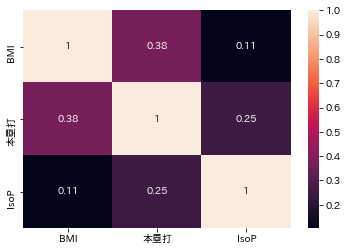

In [68]:
import seaborn as sns
sns.heatmap(data[['BMI','本塁打','IsoP']].corr(),annot=True)
plt.savefig('heat_corr.png')

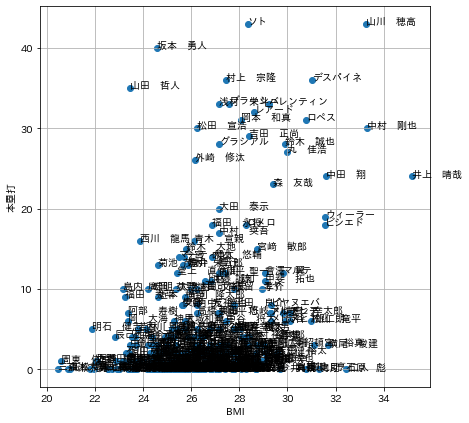

In [69]:
plt.figure(figsize=(7,7))
plt.scatter(x=data['BMI'],y=data['本塁打'])
for x, y, name in zip(data['BMI'], data['本塁打'], data['選手名']):
    plt.text(x, y, name)
plt.grid()
plt.xlabel('BMI')
plt.ylabel('本塁打')
plt.savefig('scatter.png')
plt.show()

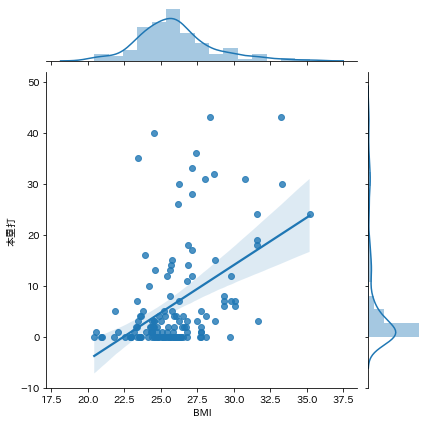

In [70]:
sns.jointplot(x='BMI',y='本塁打',data=data[data['守備']=='内野手'],kind='reg')
plt.savefig('infielder.png')

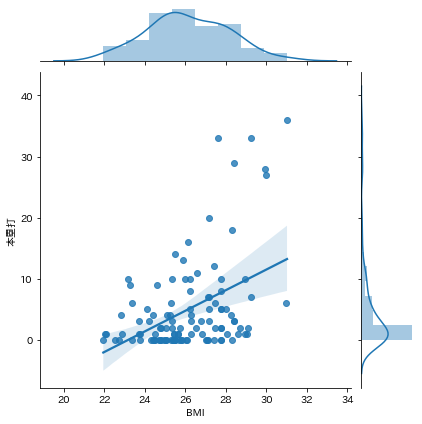

In [71]:
sns.jointplot(x='BMI',y='本塁打',data=data[data['守備']=='外野手'],kind='reg')
plt.savefig('outf_bmi_run.png')

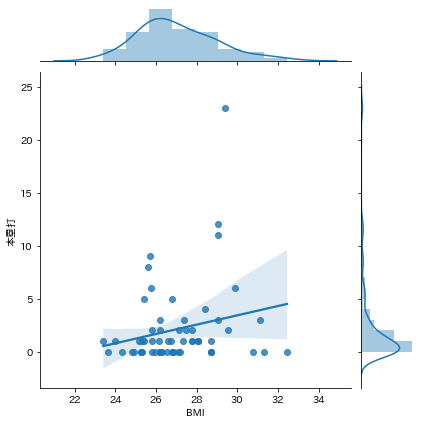

In [72]:
sns.jointplot(x='BMI',y='本塁打',data=data[data['守備']=='捕手'],kind='reg')
plt.savefig('regplot_catcher.png')

<Figure size 504x504 with 0 Axes>

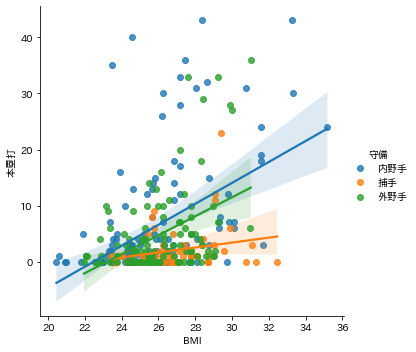

In [73]:
plt.figure(figsize=(7,7))
sns.lmplot(x='BMI',y='本塁打',data=data,hue='守備')
plt.savefig('bmi_run_posi_each.png')

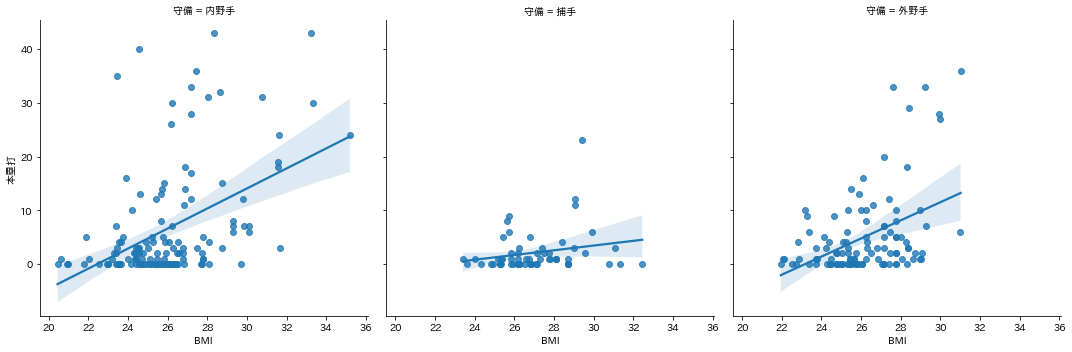

In [74]:
sns.lmplot(x='BMI',y='本塁打',data=data,col='守備')
plt.savefig('posi_bmi_run.png')

In [75]:
data.groupby('守備')

In [76]:
group_data = data.groupby('守備')

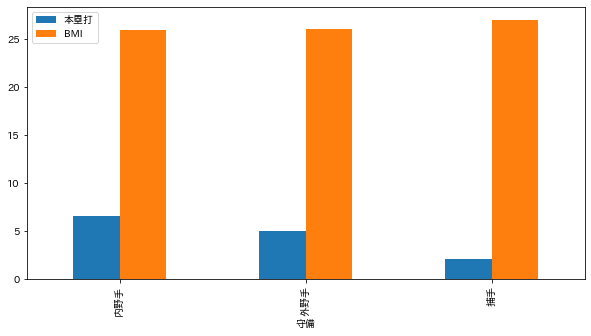

In [77]:
group_data[['本塁打','BMI']].mean().plot(kind='bar',figsize=(10,5))
plt.savefig('mean.png')

In [57]:
group_data.describe()

試合                                                           打席  \
     count       mean        std  min   25%   50%     75%    max  count   
守備                                                                        
内野手  139.0  71.597122  48.502162  1.0  26.0  74.0  114.00  143.0  139.0   
外野手  110.0  63.190909  46.329790  1.0  22.0  53.0  105.75  143.0  110.0   
捕手    61.0  44.655738  39.713510  1.0  12.0  34.0   58.00  138.0   61.0   

                 ...   年俸(推定)             BMI                              \
           mean  ...      75%      max  count       mean       std    min   
守備               ...                                                        
内野手  229.712230  ...   7000.0  50000.0  139.0  25.956187  2.524142  20.45   
外野手  198.918182  ...  10000.0  57000.0  110.0  26.126455  1.967907  21.95   
捕手   114.475410  ...   3400.0  20000.0   61.0  27.038852  1.901322  23.41   

                                    
        25%    50%      75%    max  
守備                                  
内野手  24.385  25.76  27.0100  35.19  
外野手  24.780  25.93  27.7175  31.02  
捕手   25.740  26.79  28.0900  32.45  

[3 rows x 312 columns]

In [86]:
data2 = data[data['本塁打']>=7]

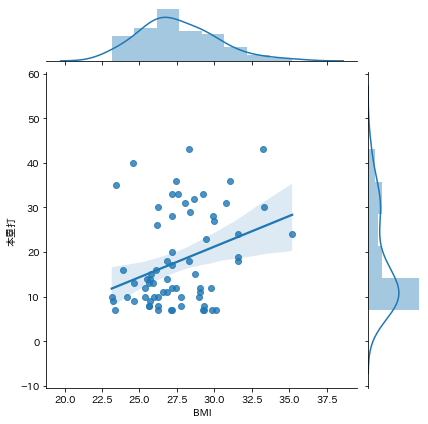

In [87]:
sns.jointplot(x='BMI',y='本塁打',data=data2,kind='reg')
plt.savefig('run_over10.png')

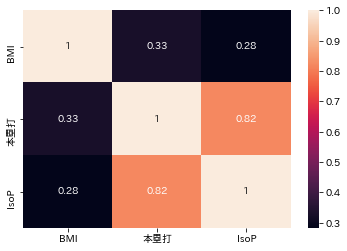

In [88]:
import seaborn as sns
sns.heatmap(data2[['BMI','本塁打','IsoP']].corr(),annot=True)
plt.savefig('heat_corr.png')